# Data Preprocessing

## Import Libraries


In [15]:
# Import Libraries

import matplotlib.dates as dates
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
housing = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col = 0)
real_estate = pd.read_csv('../data/Ames_Real_Estate_Data.csv', index_col = 0)

In [17]:
housing.shape

(2580, 81)

In [18]:
real_estate.shape

(22213, 90)

In [19]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [20]:
real_estate.columns

Index(['GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr', 'ZngCdSc',
       'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr', 'SchD_S',
       'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2', 'MA_City',
       'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo', 'Inst1_No',
       'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S', 'OthAc_S',
       'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D', 'X2TSc_D',
       'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S', 'ImpAcX1S',
       'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S', 'AcreX_S1',
       'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType', 'BldgNo_S',
       'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle', 'Foundation',
       'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating', 'Central Air',
       'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea',
       'GarageType', 'GarYrBlt', 'Cars', 'GarageArea', 'YrSold_YYYY',
       'MoSold_MM', 'SalePrice', 

## Dealing with Missing Data


Text(0.5, 1.0, 'Real Estate Dataframe NA Values')

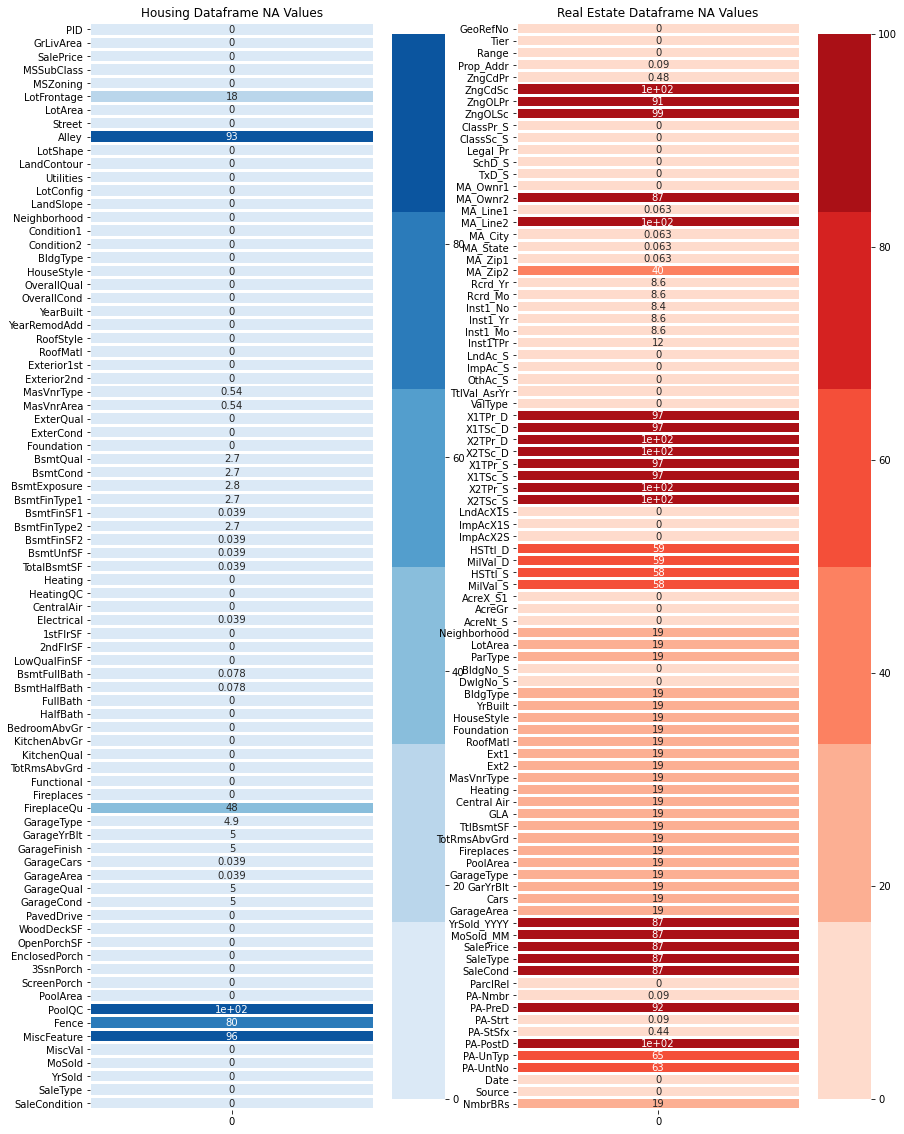

In [21]:
from IPython.display import display, HTML

cm = sns.light_palette("green",as_cmap=True)
plt.figure(figsize=(14,20))

# Housing Dataframe
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(housing.isnull().sum()/housing.shape[0]*100),annot=True,cmap=sns.color_palette("Blues"),
           linewidth=2,linecolor="white")
plt.title("Housing Dataframe NA Values")

# Real Estate Dataframe
plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(real_estate.isnull().sum()/real_estate.shape[0]*100),annot=True,cmap=sns.color_palette("Reds"),
           linewidth=2,linecolor="white")
plt.title("Real Estate Dataframe NA Values")


## Mutating Columns

In [22]:
# Create a new column MasVnrArea2 where if MasVnrArea ==0, 0 else 1
housing['MasVnrArea2'] = np.where(housing['MasVnrArea']== 0, 0, 1)

In [23]:
# Create a new colulmn GarageArea2 where the NA values are now 0
housing['GarageArea2'] = housing['GarageArea'].fillna(0)

In [24]:
# Create a new colulmn PoolArea2 where the NA values are now 0
housing['PoolArea2'] = housing['PoolArea'].fillna(0)

In [25]:
# replace NA values with 0
housing['2ndFlrSF'] = housing['2ndFlrSF'].fillna(0)

In [26]:
# Create a new column HalfBath2 and BsmtHalfBath where having a half bathroom = 0.5 for future mutation
housing['HalfBath2'] = np.where(housing['HalfBath']==1, 0.5, 0)
housing['BsmtHalfBath2'] = np.where(housing['BsmtHalfBath']==1, 0.5, 0)

In [27]:
# If BsmtFinType1 is GLQ or ALQ, we use the BsmtFinSF1
housing['BasmtFinSF1']=np.where((housing['BsmtFinType1']=='ALQ')|(housing['BsmtFinType1']=='GLQ'),\
                                 housing['BsmtFinSF1'],0)

In [28]:
# If BsmtFinType2 is GLQ or ALQ, we use the BsmtFinSF2
housing['BasmtFinSF2']=np.where((housing['BsmtFinType2']=='ALQ')|(housing['BsmtFinType2']=='GLQ'),\
                                 housing['BsmtFinSF2'],0)

In [29]:
# The Total Square Feet of Basement Finish is BasmtFinSF1 + BasmtFinSF2
housing['BasmtFinSF'] = housing['BasmtFinSF1'] + housing['BasmtFinSF2']

In [30]:
# Total Living Area is GrLivArea + BasmtFinSF
housing['total_LivArea'] = housing['GrLivArea'] + housing['BasmtFinSF']

In [31]:
# Create num_bathroom
housing['num_bathroom'] = housing['BsmtHalfBath2'] + housing['HalfBath2'] + \
                          housing['FullBath'] + housing['BsmtFullBath']

In [32]:
# Check the newly created columns
housing[['PID','BasmtFinSF1', 'BasmtFinSF2', 'BasmtFinSF', 'total_LivArea', 'num_bathroom']]

,PID,BasmtFinSF1,BasmtFinSF2,BasmtFinSF,total_LivArea,num_bathroom
1,909176150,0.0,0.0,0.0,856.0,2.0
2,905476230,552.0,393.0,945.0,1994.0,3.0
3,911128020,737.0,0.0,737.0,1738.0,1.0
4,535377150,0.0,0.0,0.0,1039.0,1.0
5,534177230,643.0,0.0,643.0,2308.0,3.5
...,...,...,...,...,...,...
759,903205040,0.0,0.0,0.0,952.0,1.0
760,905402060,0.0,0.0,0.0,1733.0,2.0
761,909275030,0.0,0.0,0.0,2002.0,2.0
762,907192040,841.0,0.0,841.0,2683.0,3.5


In [33]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [34]:
housing.shape

# 91 columns (created 10 new columns)

(2580, 91)

## Merge Data

In [35]:
# Merge housing and real_estate dataframe
ames_df = pd.merge(housing, real_estate, how = 'left', left_on = ['PID'], right_on = ['MapRefNo'], \
                   suffixes=('', '_y'))
ames_df.drop(ames_df.filter(regex = '_y$').columns.tolist(), axis = 1, inplace = True)

In [36]:

pd.set_option('display.max_columns', None)
ames_df.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MasVnrArea2,GarageArea2,PoolArea2,HalfBath2,BsmtHalfBath2,BasmtFinSF1,BasmtFinSF2,BasmtFinSF,total_LivArea,num_bathroom,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,ParType,BldgNo_S,DwlgNo_S,YrBuilt,Ext1,Ext2,Central Air,GLA,TtlBsmtSF,GarYrBlt,Cars,YrSold_YYYY,MoSold_MM,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,0,399.0,0,0.0,0.0,0.0,0.0,0.0,856.0,2.0,909176150.0,0.0,0.0,436 HAYWARD AVE,RL,NaN,NaN,NaN,RESIDENTIAL,1-STORY 1945 & OLDER,LEE & LITTLE ADD LOT 9 EX E50' BLK 2,1.0,1.0,"GREINER, RODNEY & CELIA",NaN,2088 QUAIL RIDGE RD,NaN,AMES,IA,50010.0,NaN,2017.0,2.0,2017-01476,2017.0,2.0,D,37300.0,0.0,111700.0,149000.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Dwg&Lot,0.0,1.0,1939.0,Wd Sdng,Wd Sdng,Yes,856.0,856.0,1939.0,2.0,2017.0,2.0,Normal,Deed,436,NaN,HAYWARD,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,1,266.0,0,0.0,0.0,552.0,393.0,945.0,1994.0,3.0,905476230.0,0.0,0.0,3416 WEST ST,RL,NaN,NaN,NaN,RESIDENTIAL,1-STORY TWNHM - 1946 & NEWER,WEST AMES ADD BEG NE COR LOT 12 BLK 1 S99.94' ...,1.0,1.0,"HUBERT, JOHN F & GRETTA R",NaN,3416 WEST ST,NaN,AMES,IA,50014.0,3541.0,2020.0,1.0,2020-00358,2020.0,1.0,WRDJSV,43500.0,0.0,130600.0,174100.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Dwg&Lot,0.0,1.0,1984.0,HdBoard,HdBoard,Yes,1049.0,1049.0,1984.0,1.0,2020.0,1.0,Normal,Deed,3416,NaN,WEST,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,1,266.0,0,0.0,0.0,552.0,393.0,945.0,1994.0,3.0,905476230.0,0.0,0.0,3416 WEST ST,RL,NaN,NaN,NaN,RESIDENTIAL,1-STORY TWNHM - 1946 & NEWER,WEST AMES ADD BEG NE COR LOT 12 BLK 1 S99.94' ...,1.0,1.0,"HUBERT, JOHN F & GRETTA R",NaN,3416 WEST ST,NaN,

In [37]:
ames_df.shape

(2624, 166)

## Geocoding

In [38]:
real_estate_ = real_estate.copy()

In [39]:
real_estate_.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22213 entries, 520400001 to 1018100150
Data columns (total 90 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GeoRefNo      22213 non-null  int64  
 1   Tier          22213 non-null  int64  
 2   Range         22213 non-null  int64  
 3   Prop_Addr     22193 non-null  object 
 4   ZngCdPr       22107 non-null  object 
 5   ZngCdSc       26 non-null     object 
 6   ZngOLPr       1970 non-null   object 
 7   ZngOLSc       153 non-null    object 
 8   ClassPr_S     22213 non-null  object 
 9   ClassSc_S     22213 non-null  object 
 10  Legal_Pr      22213 non-null  object 
 11  SchD_S        22213 non-null  int64  
 12  TxD_S         22213 non-null  int64  
 13  MA_Ownr1      22213 non-null  object 
 14  MA_Ownr2      2876 non-null   object 
 15  MA_Line1      22199 non-null  object 
 16  MA_Line2      0 non-null      float64
 17  MA_City       22199 non-null  object 
 18  MA_State     

In [40]:
real_estate_[['MA_Line1','MA_City','MA_State','MA_Zip1']]

,MA_Line1,MA_City,MA_State,MA_Zip1
MapRefNo,,,,
520400001,105 S 16TH ST,AMES,IA,50010.0
520440010,105 S 16TH ST,AMES,IA,50010.0
520440020,2575 N ANKENY BLVD STE 211,ANKENY,IA,50023.0
520445001,105 S 16TH ST,AMES,IA,50010.0
520445010,2575 N ANKENY BLVD STE 211,ANKENY,IA,50023.0
...,...,...,...,...
1018100010,22728 141ST ST,PERRY,IA,50220.0
1018100025,PO BOX 575,PERRY,IA,50220.0
1018100035,1229 FENNY CT,ROCHELLE,IL,61068.0


In [41]:
ames_df['address'] = ames_df['MA_Line1'].map(str) + ', ' + ames_df['MA_City'].map(str) + ', ' + \
ames_df['MA_State'].map(str)

In [42]:
ames_df[['address']]

,address
0,"2088 QUAIL RIDGE RD, AMES, IA"
1,"3416 WEST ST, AMES, IA"
2,"3416 WEST ST, AMES, IA"
3,"320 S 2ND ST, AMES, IA"
4,"1524 DOUGLAS AVE, AMES, IA"
...,...
2619,"1021 RIDGEWOOD AVE, AMES, IA"
2620,"460 WESTWOOD DR, AMES, IA"
2621,"799 W HAMILTON AVE, STATE COLLEGE, PA"
2622,"5319 CLEMENS BLVD, AMES, IA"


In [65]:
ames_df.columns[ames_df.isnull().sum()!=0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2',
       ...
       'PA-Nmbr', 'PA-PreD', 'PA-Strt', 'PA-StSfx', 'PA-PostD', 'PA-UnTyp',
       'PA-UntNo', 'Date', 'Source', 'NmbrBRs'],
      dtype='object', length=103)

In [46]:
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent = 'myGeocoder')

In [66]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
ames_df['location'] = ames_df['address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
ames_df['point'] = ames_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
ames_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(ames_df['point'].tolist(), index=df.index)


KeyboardInterrupt: 

In [34]:
from googlemaps import Client as GoogleMaps

In [40]:
housing.to_csv('data/Ames_Housing_Price_Data.csv')

In [42]:
ames_df.to_csv('data/final_data.csv')